












































































































































































































































## Introdução à Classificação com KNN
---
Uma tarefa fundamental no aprendizado de máquina é a classificação. Neste capítulo, exploraremos um modelo de classificação supervisionada: o K-Nearest Neighbors(KNN) disponível na biblioteca scikit-learn

### O que é o KNN?

O modelo de dados KNN(K-Nearest-Neighbors), ou K Vizinhos Mais Próximos, é um algoritmo de classificação e regressão supervisionado da área de aprendizado de máquina (machine learning)

### Como funcioan o KNN (em classificação)

    - 1. Treinamento: O KNN não aprende de verdade durante o treinamento. Ele apenas armazena os dados de treinamento.
    - 2. Predição (classificação)

### Exemplo prático:

In [73]:
# Realizando os imports necessários

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [74]:
# criando um dataset exemplo

df = pd.read_csv('./frutas_dataset.csv')

In [75]:
# visualizando os dados

df.head()

,peso,textura,fruta
0,156,lisa,maçã
1,132,rugosa,laranja
2,136,rugosa,laranja
3,135,lisa,maçã
4,153,lisa,maçã


In [76]:
df.tail()

,peso,textura,fruta
95,147,lisa,maçã
96,154,lisa,maçã
97,158,lisa,maçã
98,158,lisa,maçã
99,163,lisa,maçã


In [77]:
df.shape

(100, 3)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   peso     100 non-null    int64 
 1   textura  100 non-null    object
 2   fruta    100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [79]:
df.describe(
    
)

,peso
count,100.000000
mean,147.640000
std,13.250897
min,116.000000
25%,138.000000
50%,147.000000
75%,158.000000
max,180.000000


In [80]:
df.value_counts()

peso  textura  fruta  
158   lisa     maçã       7
138   rugosa   laranja    5
130   rugosa   laranja    4
147   lisa     maçã       4
163   lisa     maçã       4
152   lisa     maçã       3
143   rugosa   laranja    3
154   rugosa   maçã       3
153   lisa     maçã       3
159   lisa     maçã       3
160   lisa     maçã       3
157   lisa     maçã       3
156   lisa     maçã       3
143   lisa     maçã       3
136   rugosa   laranja    3
133   rugosa   laranja    2
148   lisa     maçã       2
139   lisa     maçã       2
141   lisa     maçã       2
126   rugosa   laranja    2
127   rugosa   laranja    2
155   lisa     maçã       2
170   lisa     maçã       2
140   rugosa   laranja    1
137   rugosa   laranja    1
131   rugosa   laranja    1
140   lisa     maçã       1
135   rugosa   laranja    1
      lisa     maçã       1
128   rugosa   laranja    1
129   rugosa   laranja    1
125   rugosa   laranja    1
123   rugosa   laranja    1
116   rugosa   laranja    1
132   rugosa   laranja   

In [81]:
df['fruta'].value_counts()

fruta
maçã       66
laranja    34
Name: count, dtype: int64

In [82]:
df_dados = df.copy()

# Tratamento as variaveis object

lb = LabelEncoder()

for variavel in ['textura', 'fruta']:
    df_dados[variavel] = lb.fit_transform(df_dados[variavel])

df_dados

,peso,textura,fruta
0,156,0,1
1,132,1,0
2,136,1,0
3,135,0,1
4,153,0,1
...,...,...,...
95,147,0,1
96,154,0,1
97,158,0,1
98,158,0,1


In [83]:
# Avaliando correlaçao das variaveis preditivas
df_dados.corr()

,peso,textura,fruta
peso,1.000000,-0.722140,0.766555
textura,-0.722140,1.000000,-0.936563
fruta,0.766555,-0.936563,1.000000


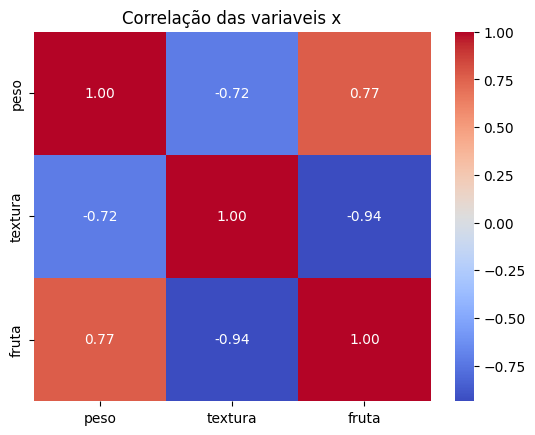

In [84]:
# correlação de forma grafica

sns.heatmap(df_dados.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das variaveis x')
plt.show()

In [85]:
correlacao_com_alvo = df_dados.corr(numeric_only=True)['fruta'].sort_values(ascending=False)

display(correlacao_com_alvo)

fruta      1.000000
peso       0.766555
textura   -0.936563
Name: fruta, dtype: float64

### Preparando os dados para treinamento


- Devemos separar os dados preditivos da variável alvo
- Também separamos 70% dos dados para treinamento e 30% para validação

In [86]:
# Separando preditoras da target
# se eu colocar df_dados['fruta'] no display vai me dar 0 ou 1, se eu colocar df['fruta'] vai aparecer no display o nome maça ou laranja
variaveis_x = df_dados.drop('fruta', axis=1)

variavel_y = df['fruta']

display(variavel_y)

0        maçã
1     laranja
2     laranja
3        maçã
4        maçã
       ...   
95       maçã
96       maçã
97       maçã
98       maçã
99       maçã
Name: fruta, Length: 100, dtype: object

In [87]:
# Separando os dados em treino e teste, esse random_state é para fazer a auditoria depois, pega dez,
#  quando eu pegar de novo, voce vai me forncecer esses mesmo 10 escolhidos antes, é uma chave de criptografia

x_treino, x_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size=0.3, random_state=10)

In [88]:
# Treinando o modelo

modelo = KNeighborsClassifier(n_neighbors=1)

modelo.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [89]:
print(len(x_treino))
print(len(x_teste))

70
30


In [90]:
# testando o modelo com as variaves separadas para teste

resultado_teste = modelo.predict(x_teste)

print(x_teste)

    peso  textura
19   140        0
14   156        0
43   143        1
37   180        0
66   139        0
3    135        0
79   148        0
41   143        0
38   133        1
68   158        0
2    136        1
1    132        1
60   147        0
53   130        1
95   147        0
74   138        1
92   133        1
26   152        0
59   170        0
46   169        0
90   163        0
70   123        1
50   125        1
44   163        0
76   128        1
55   136        1
21   158        0
61   152        0
6    170        0
63   143        0


In [91]:
# verificando a acurácia 
score = accuracy_score(y_teste, resultado_teste)

score

0.9666666666666667

não existe modelo que tenha 100% por que senão ele estaria decorando, então tá muito perto do 100 não é bom

In [92]:
for comparacao in zip(y_teste, resultado_teste):
    print(comparacao)

('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')


In [93]:
# tentando prever uma nova fruta:

fruta_nova = [[150, 1]]

resposta = modelo.predict(fruta_nova)

print(resposta)

['maçã']


c:\Users\aluno.manha\Desktop\projetos\Curso-IA\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [94]:
from sklearn.model_selection import cross_val_score

accuracia = []

k_values = range(1,31)

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelo, x_treino, y_treino, cv=5, scoring='accuracy')
    accuracia.append(scores.mean())

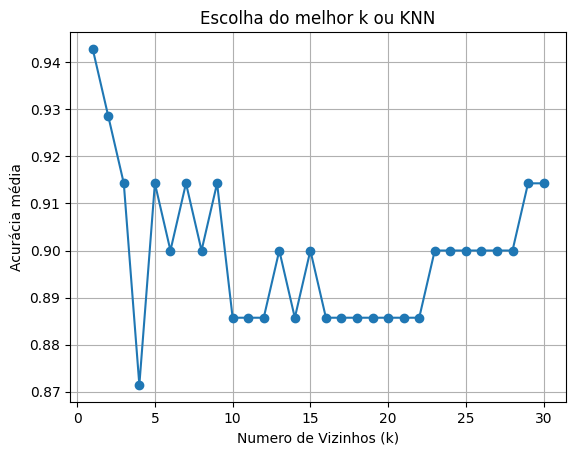

In [ ]:
plt.plot(k_values, accuracia, marker ='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia média')
plt.title('Escolha do melhor k ou KNN')
plt.grid(True)
plt.show()